In [1]:
import configparser
import os
import pickle

from gensim.models import KeyedVectors, TranslationMatrix
import numpy as np
import pandas as pd
import sktensor
import tensorly as tl


import matplotlib.pyplot as plt
%pylab inline

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

/home/makrai/tool/python/vtensor/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Populating the interactive namespace from numpy and matplotlib


In [2]:
config = configparser.ConfigParser()                                            
config.read('config.ini')                                                       

['config.ini']

# non-neg Tucker

In [3]:
from eval_tensor import VerbTensorEvaluator

In [4]:
evalor = VerbTensorEvaluator(non_negative=True, cutoff=300000)

In [5]:
evalor.load_embeddings()

In [6]:
tensor = evalor.decomped_tns

In [7]:
core = tensor.core

In [8]:
tensor.shape

(1515, 1438, 2200)

In [9]:
core.shape

(64, 64, 64)

In [10]:
height = 8
#pylab.rcParams['figure.figsize'] = (2*height, height)

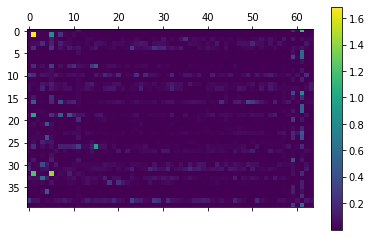

In [11]:
plt.matshow(tensor.factors[1][:40])
plt.colorbar()
plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/nonneg-mx.png')

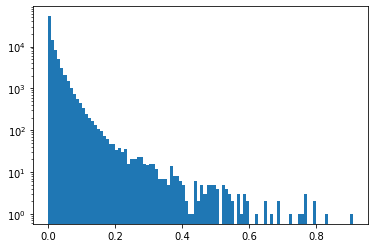

In [18]:
_ = plt.hist(np.sort(tensor.factors[1].reshape(-1))[:-10], log=True, bins=100)
plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/nonneg-histg.png')

In [59]:
mode_names = ['nsubj', 'ROOT', 'dobj']

def show_latent(latent_i, mode_i):
    surf_indices = np.argsort(-tensor.factors[mode_i][:,latent_i])
    return latent_i, ', '.join([evalor.index[mode_names[mode_i]].inv[surf_i] for surf_i in surf_indices])

In [67]:
records = []
for i in range(6,16):
    records.append(show_latent(i, 0))
print(pd.DataFrame(records, columns=['dim', 'subjects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                           subjects \\
dim &                                                    \\
\midrule
6   &  you, , that, we, I, they, company, user, he, -... \\
7   &  , system, -rrb-, we, device, report, study, he... \\
8   &  FIG., figure, which, -rrb-, we, table, chart, ... \\
9   &  stock, action, condition, development, sale, J... \\
10  &  play, value, day, round, war, number, conversa... \\
11  &  he, who, she, you, that, we, they, -rrb-, peop... \\
12  &  I, you, , he, who, they, study, which, user, s... \\
13  &  area, property, system, site, factor, device, ... \\
14  &  it, Council, Committee, board, Board, House, C... \\
15  &  we, , that, system, study, site, book, who, de... \\
\bottomrule
\end{tabular}



In [68]:
records = []
for i in range(10):
    records.append(show_latent(i, 1))
print(pd.DataFrame(records, columns=['dim', 'verbs']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                              verbs \\
dim &                                                    \\
\midrule
0   &  control, utilize, modify, use, manipulate, con... \\
1   &  have, include, provide, offer, give, contain, ... \\
2   &  move, regard, monitor, evaluate, control, opti... \\
3   &  grab, pull, put, throw, touch, knock, shove, p... \\
4   &  educate, assist, convince, persuade, kill, inf... \\
5   &  include, have, affect, contain, take, represen... \\
6   &  increase, decrease, reduce, measure, lower, bo... \\
7   &  provide, give, receive, offer, increase, have,... \\
8   &  build, expand, promote, improve, develop, enha... \\
9   &  provide, offer, facilitate, initiate, prevent,... \\
\bottomrule
\end{tabular}



In [70]:
records = []
for i in range(10):
    records.append(show_latent(i, 2))
print(pd.DataFrame(records, columns=['dim', 'objects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                            objects \\
dim &                                                    \\
\midrule
0   &  system, structure, network, object, component,... \\
1   &  , what, that, way, \%, percent, I, \$, which, wh... \\
2   &  head, ball, ass, hand, cock, face, foot, finge... \\
3   &  people, he, I, she, other, you, we, woman, the... \\
4   &  amount, system, income, component, rate, chanc... \\
5   &  frequency, concentration, density, probability... \\
6   &  infrastructure, production, supply, business, ... \\
7   &  value, datum, information, number, amount, pro... \\
8   &  experience, ability, understanding, capability... \\
9   &  transmission, exposure, production, spread, tr... \\
\bottomrule
\end{tabular}



In [65]:
records = []
for i, j, k in list(zip(*np.unravel_index(np.argsort(-core.reshape(-1)), core.shape)))[:8]:
    records.append(show_latent(i, 0))
    records.append(show_latent(j, 1))
    records.append(show_latent(k, 2))
print(pd.DataFrame(records, columns=['dim', 'words']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                              words \\
dim &                                                    \\
\midrule
19  &  -rsb-, -lsb-, disease, result, -lsb-\_NNS, -RSB... \\
22  &  -lsb-\_VBD, -lsb-\_VBP, -lsb-\_VBZ, -lsb-\_VB, -ls... \\
18  &  -rsb-, -rsb-\_NNS, -RSB-, -lsb-, 6, 1, 4, Page,... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
0   &  control, utilize, modify, use, manipulate, con... \\
0   &  system, structure, network, object, component,... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
4   &  educate, assist, convince, persuade, kill, inf... \\
3   &  people, he, I, she, other, you, we, woman, the... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
3   &  grab, pull, put, throw, touch, knock, shove, p... \\
2   &  head, ball, ass, hand, cock, face, foot, finge... \\
8   &  FIG., figure, which, -rrb-, we, table, chart, ... \\
15  &  illustrate, show, take, depict, make, use, rec... 

## Athlete ... race

In [18]:
embed = KeyedVectors(64)

In [19]:
embed.add_vectors(list(evalor.index['ROOT'].inv.values()), tensor.factors[1])

In [20]:
def predict_verb(subj='athlete', obj='race'):
    tensor1 = tensor.core
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(subj, 0), 0)
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(obj, 2), 1)
    return embed.most_similar([tensor1])

In [21]:
predict_verb()

[('have', 0.9841201901435852),
 ('include', 0.9124106764793396),
 ('provide', 0.8667762279510498),
 ('offer', 0.8448187708854675),
 ('contain', 0.8381587862968445),
 ('require', 0.7445492148399353),
 ('give', 0.6424943804740906),
 ('need', 0.6187449097633362),
 ('feature', 0.6024946570396423),
 ('affect', 0.5970800518989563)]

In [22]:
predict_verb(subj='user', obj='command')

[('contain', 0.861118733882904),
 ('provide', 0.8168653845787048),
 ('represent', 0.8076701760292053),
 ('require', 0.7967956066131592),
 ('constitute', 0.7953993082046509),
 ('feature', 0.7923411130905151),
 ('offer', 0.7908795475959778),
 ('have', 0.7721259593963623),
 ('give', 0.7590991854667664),
 ('affect', 0.7575748562812805)]

In [23]:
tensor.factors[0].shape

(1515, 64)

# Parafac

In [23]:
tensor_dir = config['DEFAULT']['ProjectDirectory']+'tensor/'
evalor = VerbTensorEvaluator(cutoff=50000, rank=256, weight='npmi', decomp_algo='parafac')
modes = ['nsubj', 'ROOT', 'dobj']

In [24]:
evalor.load_embeddings()

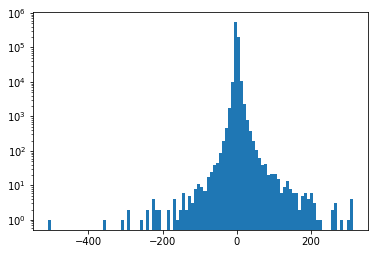

In [27]:
_ = plt.hist(np.sort(evalor.decomped_tns.factors[1].reshape(-1).todense())[:-10], log=True, bins=100)
plt.savefig('/home/makrai/repo/paper/CONLL21//verbtensor/img/posibneg-histg.png')

In [21]:
evalor.decomped_tns.weights.todense()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
i_word = [{i: w for w, i in evalor.index[j].items()} for j in modes]
vocab = [np.array([i_word[j][i] for i in range(len(i_word[j]))]) for j in range(len(i_word))]
for k, j in enumerate(
        #np.argsort(-ktensor.lmbda)[:4]):#
        range(evalor.decomped_tns.rank)):
    print(f'\n{k}')# {j}')
    for i, factor in enumerate(evalor.decomped_tns.factors):
        ids = np.argsort(factor[:,j].todense())[:7]
        print(vocab[i][ids])
        #print(['{:.1g}'.format(coord) for coord in ktensor.U[i][ids,j]])


0
['democracy' 'infrastructure' 'civilization' 'capitalism' 'core'
 'universe' 'organism']
['have' 'set' 'hold' 'build' 'carry' 'reach' 'develop']
['' 'what' 'that' 'it' '-rrb-' 'he' 'which']

1
['portion' 'Fiorina' 'correspondence' 'girl' 'SALES' 'population'
 'mechanism']
['establish' 'provide' 'show' 'remove' 'reveal' 'create' 'hit']
['relationship' 'relation' 'child' 'connection' 'kid' 'association'
 'communication']

2
['' 'I' 'you' 'we' 'they' 'he' 'who']
['watch' 'see' 'have' 'send' 'post' 'enjoy' 'complete']
['it' 'they' 'he' 'internet' 'everything' 'web' 'Internet']

3
['crowd' 'audience' 'Draco' 'fruit' 'enthusiast' 'flavor' 'door']
['win' 'show' 'raise' 'break' 'help' 'demonstrate' 'seek']
['standard' 'potential' 'power' 'resource' 'weapon' 'limit' 'gun']

4
['' 'he' 'I' 'who' 'we' 'you' 'they']
['support' 'reveal' 'receive' 'pump' 'form' 'develop' 'supply']
['' 'what' 'that' 'it' 'dominance' 'they' 'plan']

5
['im' 'condition' 'Draco' 'illness' 'particle' 'Ginny' 'page']
[

['' 'he' 'what' 'that' 'I' 'it' 'she']

53
['figure' 'table' 'result' 'datum' 'graph' 'chart' 'value']
['indicate' 'present' 'represent' 'reflect' 'show' 'describe' 'provide']
['' 'investigation' 'air' "''" 'agenda' 'enforcement' 'legitimacy']

54
['metal' 'rod' 'hip' 'advocate' 'figure' 'toe' 'identity']
['release' 'provide' 'hold' 'see' 'control' 'issue' 'update']
['anger' 'Congress' 'fear' 'public' 'government' 'voter' 'tension']

55
['team' 'I' 'police' 'Service' 'researcher' 'one' 'child']
['issue' 'abandon' 'release' 'launch' 'abolish' 'appeal' 'trade']
['statement' 'ruling' 'warning' 'guidance' 'survey' 'notice' 'subpoena']

56
['patient' 'buyer' 'office' 'subscriber' 'advertiser' 'subject' 'server']
['join' 'grab' 'kick' 'perform' 'cover' 'walk' 'lift']
['game' 'benefit' 'payment' 'crime' 'copy' 'advice' 'care']

57
['' 'that' 'they' 'it' 'which' 'he' 'we']
['feature' 'create' 'form' 'show' 'cover' 'establish' 'address']
['power' 'rights' 'authority' 'energy' 'ability' 'effort'

['shot' 'three' 'five' 'Center' '13' 'Project' '23']

106
['company' 'patient' 'family' 'community' 'individual' 'researcher'
 'citizen']
['manufacture' 'cool' 'bear' 'host' 'perform' 'heat' 'involve']
['ourselves' 'world' 'crime' 'rights' 'Americans' 'patient' 'public']

107
['blood' 'water' 'fluid' 'liquid' 'Commission' 'air' 'cock']
['include' 'show' 'add' 'apply' 'bring' 'accelerate' 'expand']
['water' 'report' 'liquid' 'meeting' 'fuel' 'statement' 'information']

108
['' 'they' 'he' 'we' 'who' 'you' 'I']
['have' 'reach' 'follow' 'use' 'gain' 'get' 'draw']
['world' 'mind' 'existence' 'head' 'ourselves' 'tax' 'truth']

109
['' 'we' 'you' 'I' 'he' 'who' 'they']
['consist' 'experience' 'provide' 'develop' 'fly' 'open' 'decide']
['decision' 'mistake' 'effort' 'announcement' 'choice' 'progress'
 'determination']

110
['FIG.' 'FIGS.' 'figure' '' '-rsb-' '-lsb-' 'diagram']
['illustrate' 'show' 'depict' 'represent' 'provide' 'include' 'describe']
['presence' 'evidence' 'willingness' 'exist

['hair' 'product' 'belly' 'cloud' 'application' 'lover' 'toe']
['turn' 'make' 'teach' 'meet' 'commit' 'face' 'ask']
['himself' 'herself' 'myself' 'yourself' 'themselves' 'meeting'
 'ourselves']

156
['' 'that' 'which' 'they' 'who' 'it' 'we']
['support' 'represent' 'raise' 'serve' 'launch' 'involve' 'lift']
['audience' 'crowd' 'talent' 'chance' 'fan' 'ability' 'experience']

157
['' 'he' 'who' 'they' 'I' 'she' 'you']
['give' 'receive' 'draw' 'take' 'seek' 'pull' 'hold']
['ankle' 'arm' '$' 'leg' 'hand' 'mark' 'concern']

158
['dollar' 'billion' 'euro' 'spend' 'penny' '£' 'popularity']
['get' 'make' 'receive' 'pay' 'give' 'draw' 'catch']
['' 'what' 'attention' 'that' 'fee' 'tax' 'price']

159
['' 'that' 'they' 'we' 'who' 'he' 'you']
['provide' 'offer' 'add' 'show' 'deliver' 'serve' 'demonstrate']
['life' 'money' 'issue' 'rule' 'law' 'standard' 'world']

160
['' 'I' 'he' 'you' 'she' 'who' 'they']
['wear' 'eat' 'get' 'turn' 'cook' 'don' 'nod']
['book' 'novel' 'beer' 'article' 'poem' 'coffee

['baby' 'television' 'clock' 'tv' 'web' 'Web' 'kid']

209
['' 'you' 'I' 'he' 'we' 'they' 'who']
['make' 'open' 'get' 'say' 'receive' 'close' 'announce']
['sense' 'job' 'journey' 'noise' 'sound' 'friendship' 'confidence']

210
['change' 'decision' 'action' 'this' 'policy' 'loss' 'move']
['contribute' 'result' 'increase' 'consist' 'reduce' 'present' 'interfere']
['effect' 'impact' 'potential' 'implication' 'consequence' 'nothing'
 'influence']

211
['book' 'report' 'article' 'paper' 'course' 'section' 'study']
['provide' 'give' 'offer' 'include' 'present' 'contain' 'show']
['' 'service' 'what' 'feature' 'that' 'system' 'use']

212
['i' 'some' 'many' 'everyone' 'symptom' 'most' 'species']
['surround' 'develop' 'use' 'feature' 'face' 'play' 'explore']
['signal' 'datum' 'region' 'surface' 'park' 'building' 'land']

213
['i' 'one' 'people' 'family' 'team' 'child' 'change']
['have' 'provide' 'need' 'offer' 'receive' 'kill' 'give']
['relationship' 'experience' 'idea' 'life' 'role' 'ability' 'a

|rank|$\lambda$|e.g.|
|----|---------|----|
|16|1|topic/example (2) provide/offer (2) assistance/guidance|
|32|1|Android (3)  win degree (1)|
|64|1|I describe (1) game/story (2)|